#  WGU MSDA D212 Data Mining II Task 1 - Clustering Techniques

## Jan Francis Mitchell Barlaan

### A1: Proposal of Question
* My research question asks if k-means clustering can identify customer segments within a certain combination of socioeconomic factors and service subscription variables, and are some combinations more likely to churn than others and vice versa? 

### A2: Defined Goal
* The goal of this clustering analysis is to identify if certain clusters of customers exist that can be used as models to optimize subscription packages and services. Ultimately, customer satisfaction is the goal, which would in turn minimize or mitigate churn. Unfortunately, due to the requirements of this rubric limiting me to continuous variables, I cannot incorporate the Churn categorical variable in this analysis.

### B1: Explanation of the Clustering Technique
* K-means clustering initially picks central points called centroids at random. Surrounding data points from these randomly chosen centroids are assigned to the closest center, subsequently forming a cluster. Once initial cluster assigment has occurred, the average position of points within a cluster are updated. This process continues until the centroids stop changing (K means clustering - introduction 2025). An expected outcome is finding groups of customers based on certain features. 

### B2: Summary of the Technique Assumption
* One assumption of K-means clustering is that the clusters have the same variance. Essentially, data point distribution around each cluster is similar. Drastic differences in cluster variances can negatively affect the effectiveness of K-means (GeeksforGeeks, Demonstration of K-means assumptions 2023).


### B3: Packages or Libraries List
 I chose to use Python 3 kernel within the Jupyter Notebook IDE to perform this task due to its ease of use and integration with visualization and statistical modeling. Using Python as the main programming language also enabled me to use several libraries:
* Pandas was used to easily handle large datasets
* Numpy was used in mathematical calculations and operations
* Matplotlib and Seaborn were used for visualizations
* Missigno was used to visualize nulls
* Scipy and Scikit-learn assisted in ML and predictive modeling 
* RobustScaler to handle outliers prior to clustering

### C1: Data Preprocessing
* One preprocessing method that I will predominantly use is dimensionality reduction via feature selection. Using this method, I will drop variables that I have deemed irrelevant for this analysis. 

### C2: Data Set Variables

* The variables listed below will be used in this task.


| Variable    | Categorical/Continuous 
| :--------: | :-------: 
| Tenure  | Continuous 
| Bandwidth_GB_Year | Continuous 
| MonthlyCharge | Continuous 
| Outage_sec_perweek | Continuous 
| Income | Continuous 
| Population | Continuous



 

### C3: Steps for Analysis
* My data preprocessing goals involves most of the same basic data cleaning steps that I have performed in previous tasks, which include detecting duplicates, nulls, and outliers and addressing them if present. Outliers will be detected for with boxplots. I will also create a new dataframe with only the columns that I have deemed relevant for the k-means clustering analysis. Some columns/variables will be renamed for easier identification and Yes/No columns will be converted to Boolean. Finally, I will apply RobustScaler to the new dataframe if outliers are detected in the selected features. The following code is what I used to accomplish these data cleaning goals.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D212\Churn Dataset/churn_clean.csv', index_col=0)

In [2]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [3]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [4]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

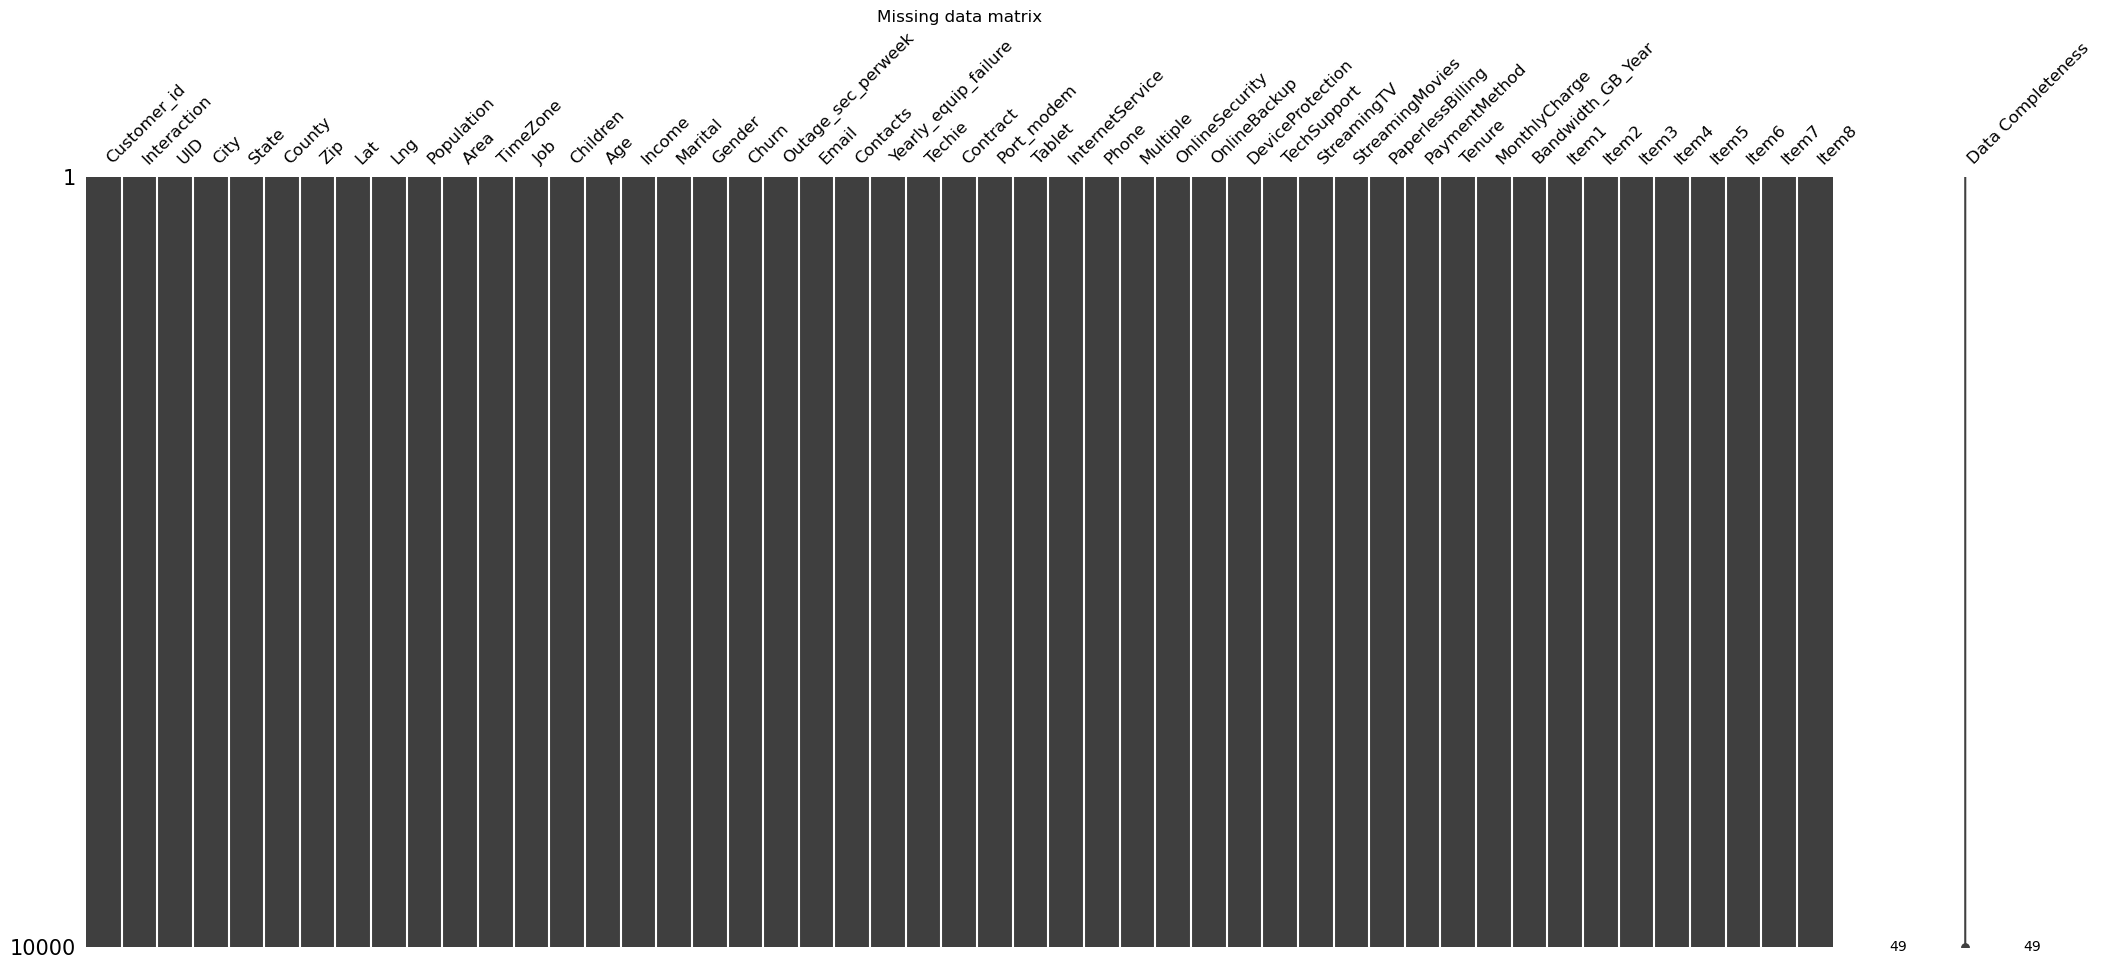

In [5]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


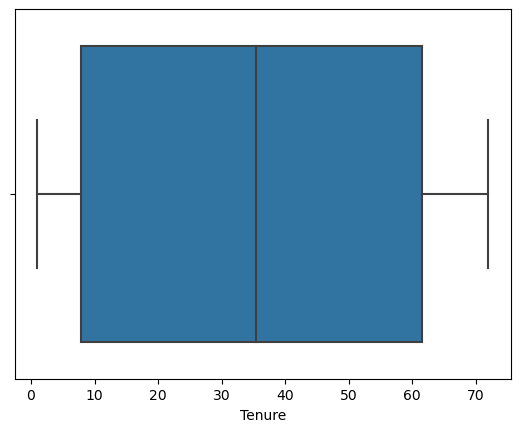

In [6]:
#Outlier check with boxplot on 'Tenure'

boxplot=sns.boxplot(x='Tenure',data=df)

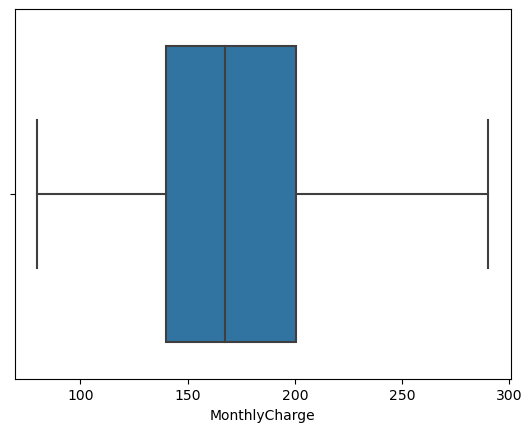

In [7]:
#Outlier check with boxplot on 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

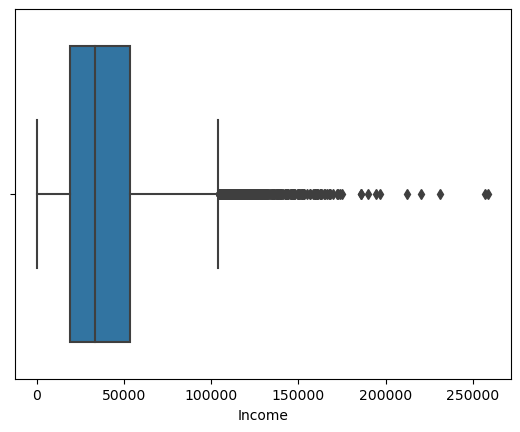

In [8]:
#Outlier check with boxplot on 'Income'

boxplot=sns.boxplot(x='Income',data=df)

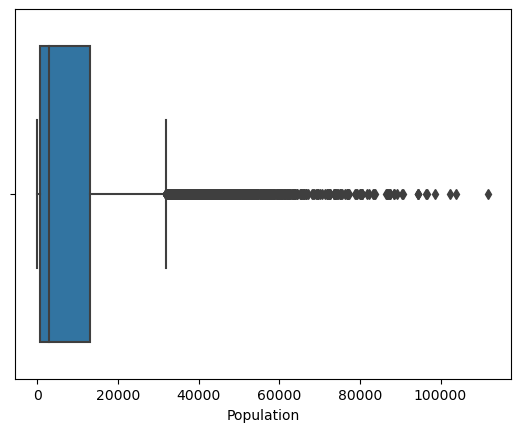

In [9]:
#Outlier check with boxplot on 'Population'

boxplot=sns.boxplot(x='Population',data=df)

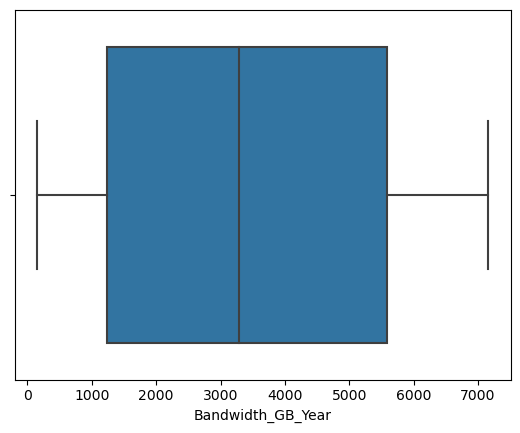

In [10]:
#Outlier check with boxplot on numerical continuous independent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

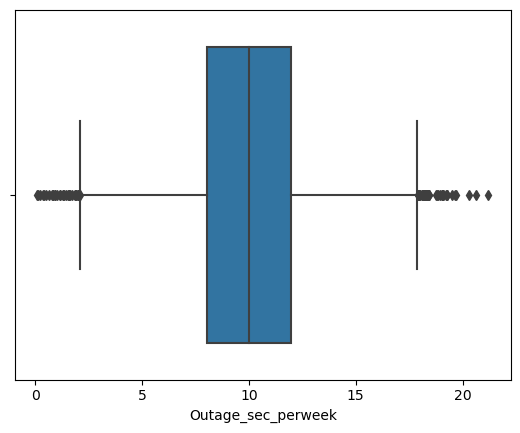

In [11]:
#Outlier check with boxplot on numerical continuous independent variable 'Outage_sec_perweek'

boxplot=sns.boxplot(x='Outage_sec_perweek',data=df)

In [12]:
#Rename Bandwidth_GB_Year
df['Year_Data_Usage'] = df['Bandwidth_GB_Year']

#Rename MonthlyCharge
df['Monthly_Charge'] = df['MonthlyCharge']

#Rename Outage_sec_perweek	
df['Weekly_Outage_Duration'] = df['Outage_sec_perweek']


In [13]:
#Create new dataframe containing only the relevant columns for this analysis

Cluster_df = df[['Year_Data_Usage', 'Monthly_Charge', 'Weekly_Outage_Duration', 'Tenure', 'Income', 'Population']]

Cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year_Data_Usage         10000 non-null  float64
 1   Monthly_Charge          10000 non-null  float64
 2   Weekly_Outage_Duration  10000 non-null  float64
 3   Tenure                  10000 non-null  float64
 4   Income                  10000 non-null  float64
 5   Population              10000 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 546.9 KB


In [14]:
Cluster_df.head()

,Year_Data_Usage,Monthly_Charge,Weekly_Outage_Duration,Tenure,Income,Population
CaseOrder,,,,,,
1,904.536110,172.455519,7.978323,6.795513,28561.99,38
2,800.982766,242.632554,11.699080,1.156681,21704.77,10446
3,2054.706961,159.947583,10.752800,15.754144,9609.57,3735
4,2164.579412,119.956840,14.913540,17.087227,18925.23,13863
5,271.493436,149.948316,8.147417,1.670972,40074.19,11352


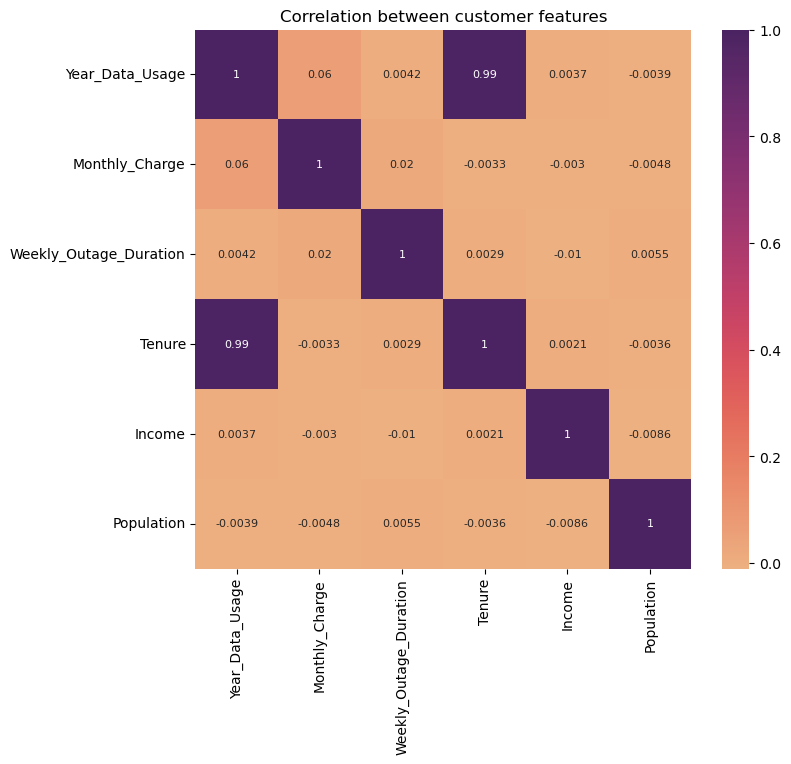

In [15]:
#Exploration of relation between customer features

plt.figure(figsize=(8,7))
sns.heatmap(Cluster_df.corr(), annot=True, annot_kws={"fontsize":8}, cmap="flare")
plt.title("Correlation between customer features")
plt.show()

In [16]:
# Using RobustScaler to scale features and handle outliers prior to K-means clustering

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaled_data = Cluster_df

scaled_data = scaler.fit_transform(scaled_data)

scaled_data = pd.DataFrame(scaled_data, columns=Cluster_df.columns)

scaled_data.head()

,Year_Data_Usage,Monthly_Charge,Weekly_Outage_Duration,Tenure,Income,Population
0,-0.546019,0.081817,-0.516350,-0.534613,-0.135462,-0.231094
1,-0.569826,1.236890,0.425311,-0.639889,-0.337018,0.606235
2,-0.281591,-0.124057,0.185824,-0.367356,-0.692535,0.066331
3,-0.256331,-0.782281,1.238837,-0.342468,-0.418717,0.881134
4,-0.691557,-0.288639,-0.473555,-0.630288,0.202919,0.679123


In [17]:
RobustScaled_Cluster_df = scaled_data

In [18]:
RobustScaled_Cluster_df.std()

Year_Data_Usage           0.502405
Monthly_Charge            0.706818
Weekly_Outage_Duration    0.753180
Tenure                    0.493690
Income                    0.828886
Population                1.161118
dtype: float64

In [19]:
RobustScaled_Cluster_df.head()

,Year_Data_Usage,Monthly_Charge,Weekly_Outage_Duration,Tenure,Income,Population
0,-0.546019,0.081817,-0.516350,-0.534613,-0.135462,-0.231094
1,-0.569826,1.236890,0.425311,-0.639889,-0.337018,0.606235
2,-0.281591,-0.124057,0.185824,-0.367356,-0.692535,0.066331
3,-0.256331,-0.782281,1.238837,-0.342468,-0.418717,0.881134
4,-0.691557,-0.288639,-0.473555,-0.630288,0.202919,0.679123


### C4: Cleaned Data Set

In [20]:
# Save prepared RobustScaled Cluster dataframe to CSV

RobustScaled_Cluster_df.to_csv('RobustScaled_Cluster.csv', index=False)

### D1: Output and Intermediate Calculations

* Using the provided Churn dataset, my analysis conducts K-means clustering, which is iterated over a range of values. In this case, the range spans from 1-10. Each value receives its own K-means model, has each model fit to a subset of the data, and finally, is assigned an inertia. The inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A model is considered good when it has both low inertia and a low number of clusters, however, there is a tradeoff and balancing act since K increases as inertia decreases and vice versa (Machine learning: Unsupervised learning : Clustering: K-means Cheatsheet). 



* Prior to clustering, PCA will be performed to reduce the dimensionality to 2. This is done because K-Means inherently has difficulty dealing with high dimensionality data.

* In order to find the optimal number of clusters, the Elbow Method was used by plotting the WCSS/inertia against the number of clusters and identifying the "elbow" point in the plot, which represents the number of clusters beyond which the rate of decrease in WCSS significantly slows down. Beyond this point, the addition of more clusters no longer improves the clustering quality by a substantial amount. The Silhouette Score Method was also used to further support the Elbow Method results as shown below.

* Once the optimal number of clusters have been found,the clusters are then appended to the original working dataframe and visualized via scatterplot.

In [21]:
#Fit RobustScaled dataframe with PCA

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(RobustScaled_Cluster_df)

PCA()

In [22]:
#Display variance explained by each of the 6 chosen components

pca.explained_variance_ratio_

array([0.37472524, 0.19101096, 0.15810125, 0.14179245, 0.13392461,
       0.00044548])

Text(0, 0.5, 'Cumulative Explained Variance')

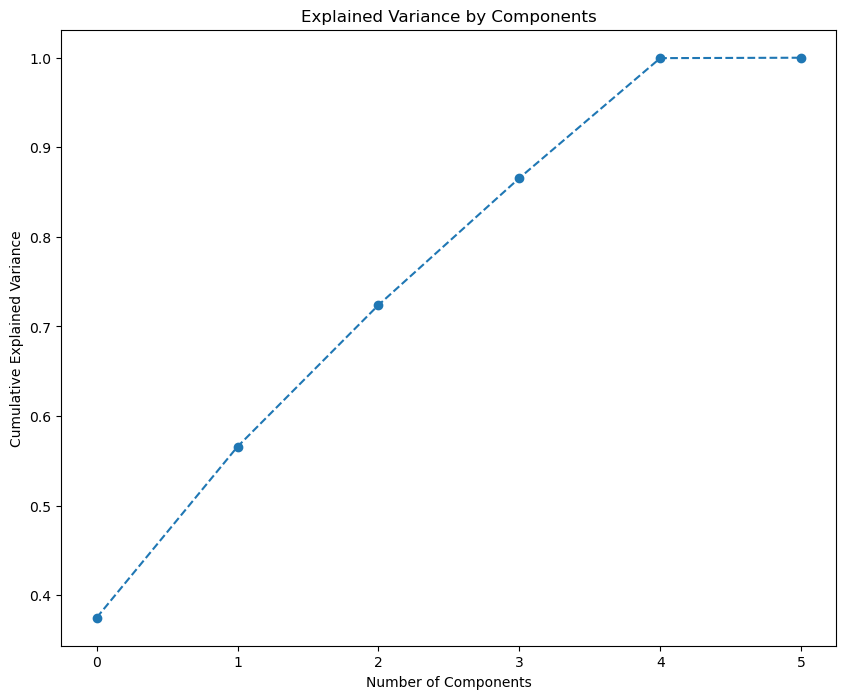

In [23]:
#Plot Cumulative Explained Variance 

plt.figure(figsize = (10,8))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [24]:
#We will choose 4 components in order to preserve at least 80% of the variance (the first component begins at 0)

pca = PCA(n_components = 4)

In [25]:
#Fit the model to our data with the selected number of 4 components.

pca.fit(RobustScaled_Cluster_df)

PCA(n_components=4)

In [26]:
#Calculate component scores

pca.transform(RobustScaled_Cluster_df)

array([[-0.77791625, -0.31871473, -0.5632112 , -0.42013055],
       [ 0.06270079, -0.57319154,  0.53574191,  0.23412686],
       [-0.4693493 , -0.90321226,  0.07969352, -0.48579532],
       ...,
       [-0.76065713,  0.21946067, -0.82566012,  0.29317072],
       [ 2.0790522 , -0.68871088,  0.74703869,  1.54654188],
       [ 0.20688155, -0.92756311,  0.55603793,  0.98719731]])

In [27]:
#Assign scores_pca alias to our PCA transformed dataset

scores_pca = pca.transform(RobustScaled_Cluster_df)

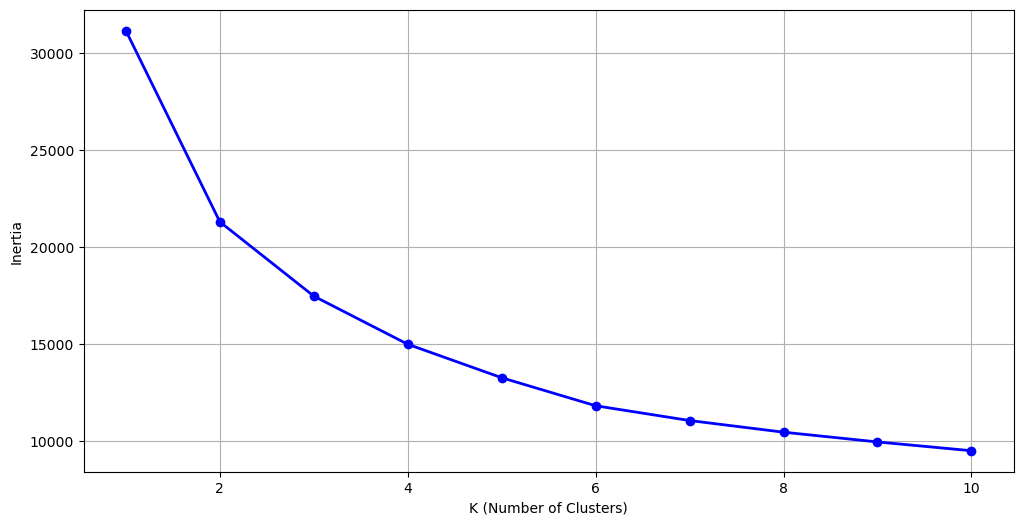

In [28]:
#Plot WCSS/Inertia/Elbow Method

inertia = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters=i, n_init= 11, random_state = 42)
    kmeans_pca.fit(scores_pca)
    inertia.append(kmeans_pca.inertia_)
    
#Plotting the elbow graph
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), inertia, 'o-', linewidth=2, color='blue')
plt.xlabel('K (Number of Clusters)')
plt.ylabel('Inertia')
plt.show()

n_clusters = 2, the silhouette score is 0.4104080189142782
n_clusters = 3, the silhouette score is 0.2738851175328594
n_clusters = 4, the silhouette score is 0.22111267176469432
n_clusters = 5, the silhouette score is 0.22108137581313572
n_clusters = 6, the silhouette score is 0.2198295021115469
n_clusters = 7, the silhouette score is 0.20477507457118052
n_clusters = 8, the silhouette score is 0.202121540654719
n_clusters = 9, the silhouette score is 0.1952026806278478
n_clusters = 10, the silhouette score is 0.19801559210958974


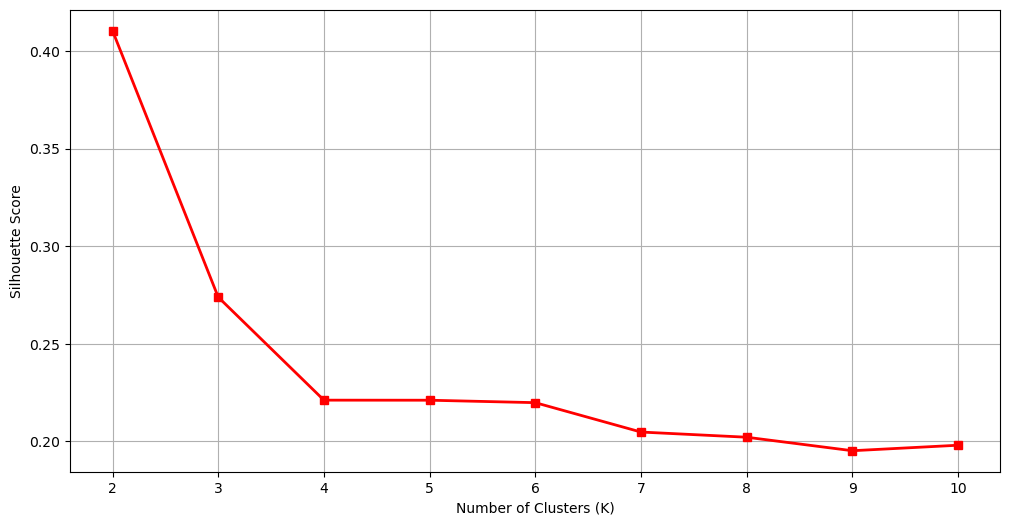

In [29]:
clusters_range = range(2, 11)

# List for silhouette scores
silhouette_scores = []

# Loop through different numbers of clusters
for i in clusters_range:
    kmeans_pca = KMeans(n_clusters=i, n_init= 11, random_state = 42)
    kmeans_pca.fit(scores_pca)

# Calculate silhouette score
    silhouette_avg = silhouette_score(scores_pca, kmeans_pca.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"n_clusters = {i}, the silhouette score is {silhouette_avg}")

# visualizing the silhouette score
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(clusters_range, silhouette_scores, 's-', linewidth=2, color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [30]:
#We will choose 2 clusters since this is the best choice based on the WCSS and Silhouette Score Methods

kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)

#Fit the data with the K-Means PCA model

kmeans_pca.fit(scores_pca)

kmeans_pca.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
#Display the two clusters with 4 components each

kmeans_pca.cluster_centers_

array([[-0.45757094, -0.00279723, -0.00245303,  0.00361086],
       [ 2.15115734,  0.01315051,  0.0115323 , -0.01697558]])

In [32]:
# Calculate WCSS/Inertia
inertia = kmeans_pca.inertia_

# Calculate Silhouette Score
labels = kmeans_pca.labels_
silhouette_avg = silhouette_score(scores_pca, kmeans_pca.labels_)

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scores_pca, kmeans_pca.labels_)

# Print the metrics
print("WCSS/Inertia:", inertia)
print("Silhouette Score:", silhouette_avg)
print("Davies-Bouldin Index:", db_index)

WCSS/Inertia: 21300.133221353768
Silhouette Score: 0.41013344361649806
Davies-Bouldin Index: 1.1010114189796067


### D2: Code Execution


In [33]:
#K-Means Clustering with PCA Results


#Create a new dataframe with the original features and the PCA scores and assigned clusters to it

RobustScaled_Cluster_df_pca_kmeans = pd.concat([RobustScaled_Cluster_df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
RobustScaled_Cluster_df_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']

#The final column contains the PCA K-Means clustering labels

RobustScaled_Cluster_df_pca_kmeans['Segment K-Means PCA'] = kmeans_pca.labels_

In [34]:
#Preview new dataframe 

RobustScaled_Cluster_df_pca_kmeans.head()

,Year_Data_Usage,Monthly_Charge,Weekly_Outage_Duration,Tenure,Income,Population,Component 1,Component 2,Component 3,Component 4,Segment K-Means PCA
0,-0.546019,0.081817,-0.516350,-0.534613,-0.135462,-0.231094,-0.777916,-0.318715,-0.563211,-0.420131,0
1,-0.569826,1.236890,0.425311,-0.639889,-0.337018,0.606235,0.062701,-0.573192,0.535742,0.234127,0
2,-0.281591,-0.124057,0.185824,-0.367356,-0.692535,0.066331,-0.469349,-0.903212,0.079694,-0.485795,0
3,-0.256331,-0.782281,1.238837,-0.342468,-0.418717,0.881134,0.351280,-0.666314,1.017631,-1.122601,0
4,-0.691557,-0.288639,-0.473555,-0.630288,0.202919,0.679123,0.130515,0.031898,-0.579208,-0.809626,0


In [35]:
#Add segment names to the cluster labels

RobustScaled_Cluster_df_pca_kmeans['Segment'] = RobustScaled_Cluster_df_pca_kmeans['Segment K-Means PCA'].map({0: 'first', 1: 'second'})

In [36]:
#Preview cluster mapping

RobustScaled_Cluster_df_pca_kmeans.head()

,Year_Data_Usage,Monthly_Charge,Weekly_Outage_Duration,Tenure,Income,Population,Component 1,Component 2,Component 3,Component 4,Segment K-Means PCA,Segment
0,-0.546019,0.081817,-0.516350,-0.534613,-0.135462,-0.231094,-0.777916,-0.318715,-0.563211,-0.420131,0,first
1,-0.569826,1.236890,0.425311,-0.639889,-0.337018,0.606235,0.062701,-0.573192,0.535742,0.234127,0,first
2,-0.281591,-0.124057,0.185824,-0.367356,-0.692535,0.066331,-0.469349,-0.903212,0.079694,-0.485795,0,first
3,-0.256331,-0.782281,1.238837,-0.342468,-0.418717,0.881134,0.351280,-0.666314,1.017631,-1.122601,0,first
4,-0.691557,-0.288639,-0.473555,-0.630288,0.202919,0.679123,0.130515,0.031898,-0.579208,-0.809626,0,first


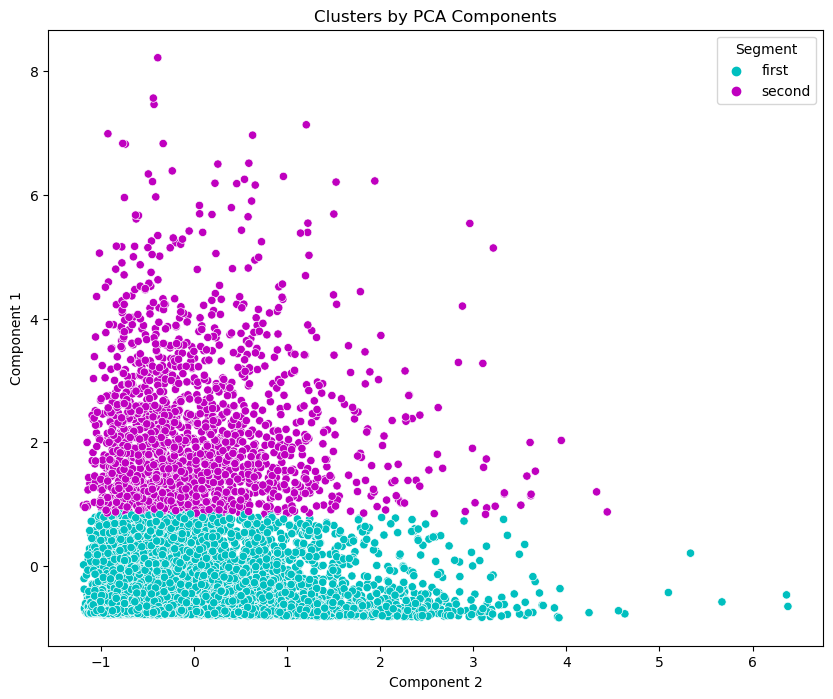

In [37]:
#2D visualization of our first two K-Means PCA components


x_axis = RobustScaled_Cluster_df_pca_kmeans['Component 2']
y_axis = RobustScaled_Cluster_df_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x = x_axis, y = y_axis, hue = RobustScaled_Cluster_df_pca_kmeans['Segment'], palette = ['c', 'm'])
plt.title('Clusters by PCA Components')
plt.show()

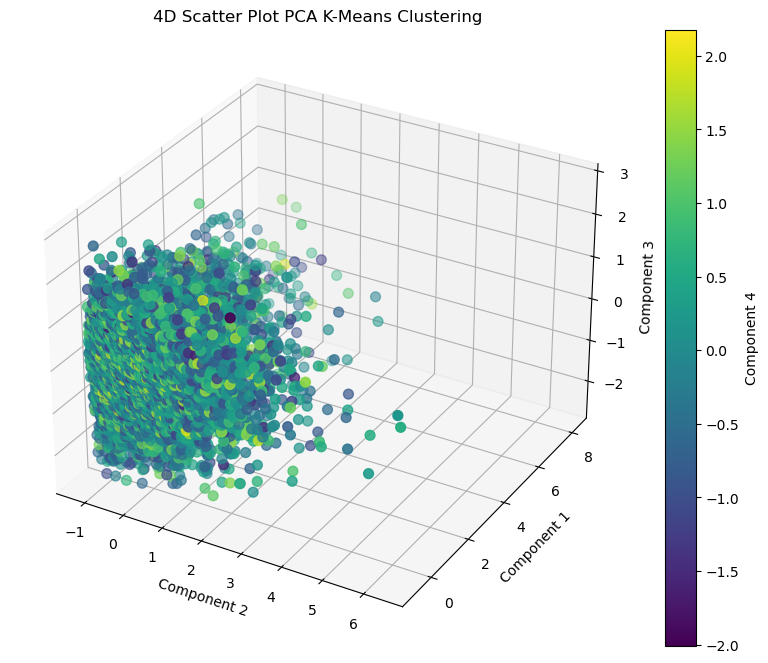

In [38]:
#4D visualization of our 4 K-Means PCA components with the 4th Component as a marker color

from mpl_toolkits.mplot3d import Axes3D

#Data
x = RobustScaled_Cluster_df_pca_kmeans['Component 2']
y = RobustScaled_Cluster_df_pca_kmeans['Component 1']
z = RobustScaled_Cluster_df_pca_kmeans['Component 3']
w = RobustScaled_Cluster_df_pca_kmeans['Component 4']


# Create the figure and axes object
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot, mapping 'w' to color
scatter = ax.scatter(x, y, z, c=w, cmap='viridis', s=50)

# Add a colorbar to show the mapping of 'w' to color
plt.colorbar(scatter, label='Component 4')

# Set axis labels
ax.set_xlabel('Component 2')
ax.set_ylabel('Component 1')
ax.set_zlabel('Component 3')


# Set title
plt.title('4D Scatter Plot PCA K-Means Clustering')

# Show the plot
plt.show()

### E1: Quality of the Clustering Technique
* The Silhouette method was used to evaluate the clustering results of the K-means Cluster model. This method works by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters. Scoring ranges from -1 to +1. Positive values indicate that data points are in the right clusters - good clustering results. Zero suggest overlapping clusters and/or data points that are close to multiple clusters. Negative values indicate that the data points have been assigned to the wrong clusters - poor clustering results. Ultimately, a high Silhouette score is indicative of consistent and better clustering results. Conversely, low Silhouette scores can indicate that the data points have been assigned to the wrong clusters or that the specific clustering method is not suitable the data (Gultekin, What is silhouette score? 2023). 



* Our Silhouette score of 0.41 indicates that the clusters are moderately separated from one another. Higher values are always better, but a positive score of some sort indicates that the data points are in the right clusters. 


* Within-Cluster Sum of Squares (WCSS) also known as inertia, was one of the methods used to determine the optimal amount of clusters and assists in evaluating the compactness of the clusters. It works by measuring the sum of squared distances between each data point and the centroid of its assigned cluster. The centroid is the mean position of all the points in the cluster. Lower WCSS values indicate well-defined and compact clusters: Data points in each cluster are close to each other. Cluster amount and WCSS have an inverse relationship, with WCSS decreasing as data points are grouped into even smaller, more compact clusters (Rallabandi, WCSS: How many clusters are good enough? 2024). 

* The WCSS score was 21,300, which is subjectively low to moderate for my purposes in this K-Means clustering analysis. This indicates that the clusters are spread out relatively well from their centroids and that the clusters are more compact.

* Another evaluation method used to assess the clustering was the Davies-Bouldin Index (DBI). This method assesses clustering quality by comparing the average similarity between the pairwise most similar clusters. The DBI is a relative clustering validity index in that it compares clustering results to hypothetical "ideal" clusters. Lower DBI values indicate better clusters that are compact and well-separated while higher DBI values indicate poorer clusters that are not well-separated and/or compact (GeeksforGeeks, Davies-Bouldin index 2023).

* Our DBI score is on the lower end at 1.10, further supporting and indicating that our clusters are well-separated and compact.

### E2: Results and Implications
* PCA was performed to reduce the dimensionality to 4 components.
* The Elbow Method was used to arrive at the optimal value of 2 for K. This was further supported by the Silhouette score of 0.41 at n_clusters = 2. 
* Upon observation of the scatterplots, certain customer segments can be established based on features such as Tenure, Bandwidth_GB_Year, MonthlyCharge, Population, Income, and Outage_sec_perweek. The clusters may be more obvious in the 2D  plot, however, a more comprehensive representation can be seen in the 4D version of the scatterplot. 
* According to this analysis, the optimal number of clusters and components for this data is 2 and 4, respectively. Best practices were used during each of the methods involved in model optimization, however, one can argue whether this optimal number of clusters and components is truly meaningful since each optimization method lends itself to the analyst's subjectivity.  

### E3: Limitation
* A glaring limitation of this analysis is the fact that I am not allowed to use categorical variables. Another limitation is the inherent weakness of K-Means clustering once higher dimension data is involved. This was the main reason PCA was conducted to reduce the dimensionality to 4 components. Also, as previously mentioned, methods such as WCSS/Inertia, Silhouette Method, and Component selection via a Cumulative Variance Plot are all subjective. 

### E4: Course of Action
* A recommendation to improve the model for this analysis would be to obtain better customer data and/or at least incorporate categorical variables instead of having a limitation of continuous variables only. Alternatively, this data could potentially be better suited to hierarchical clustering when attempting to build customer segments based on cluster results since this type of analysis would allow for the incorporation of more features that are already available in the existing dataset. 

### F: Panopto Video of Code
* My Panopto Submission can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=654039d6-70fe-49b8-b969-b2980069304e

### G: Source for Third-Party Code
* How to combine PCA & K-means clustering in Python. 365 Data Science. (2024, April 15). https://365datascience.com/tutorials/python-tutorials/pca-k-means/ 

### H: Sources

* GeeksforGeeks. (2023a, November 5). Davies-Bouldin index. https://www.geeksforgeeks.org/davies-bouldin-index/ 
* GeeksforGeeks. (2023b, December 9). Demonstration of K-means assumptions. https://www.geeksforgeeks.org/demonstration-of-K-means-assumptions/ 
* Gultekin, H. (2023, September 7). What is silhouette score?. Medium. https://medium.com/@hazallgultekin/what-is-silhouette-score-f428fb39bf9a#:~:text=%3A%22%2C%20silhouette_avg)-,The%20Silhouette%20score%20is%20a%20metric%20used%20to%20evaluate%20how,out%2Dof%2Dcluster%20discrimination. 
* How to combine PCA & K-means clustering in Python. 365 Data Science. (2024, April 15). https://365datascience.com/tutorials/python-tutorials/pca-k-means/ 
* K means clustering - introduction. GeeksforGeeks. (2025, January 15). https://www.geeksforgeeks.org/k-means-clustering-introduction/ 
* Machine learning: Unsupervised learning : Clustering: K-means Cheatsheet. Codecademy. (n.d.). https://www.codecademy.com/learn/dspath-unsupervised/modules/dspath-clustering/cheatsheet 
* Rallabandi, S. (2024, August 1). WCSS: How many clusters are good enough?. Medium. https://medium.com/@sreeku.ralla/wcss-how-many-clusters-are-good-enough-74f91c06dc75 
* Sohail. (2021, August 1). Outlier handling using robust Scaler - a python tutorial. Medium. https://medium.com/@syedar.sohail/outlier-handling-using-robust-scaler-a-python-tutorial-613d174b58eb 